# Finding the temporal autocorrelation order and evidence of slope
This notebook fits an ARIMA model for ADPE at CROZIER

In [5]:
# Load libraries
library(forecast); library(ggplot2);library(dplyr); library(fmsb); library(stats); library(ggplot2); library(modelr); library(lmtest); library(pdp)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [104]:
# Load the data
master<-read.csv("~/Workspace/Anthropocene/data/MASTER_SIE.csv")

In [105]:
head(master)

,X,year,intP_RSP,mnChl_aw_RSP,mnOW_RSP,nmSST_aw_RSP,mnAirTemp,mnWind,mnSIE,GyreSPD,⋯,Salinity,ICEBERG,ADPE_BIRD,ADPE_CROZ,ADPE_RO,EMPE,WESE,WESE_1,av_SIE,SIC
,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1998,19.90901,1.161487,250157,-0.690398,-5.650,7.80,3.126,6.3,⋯,34.845,0,38252,125441,34110,1108,0.6388527,NA,3.126,17.2
2,2,1999,22.75003,1.353060,218399,-0.901666,-5.900,7.76,3.269,6.7,⋯,NA,0,47350,156441,36200,798,0.6505867,NA,3.269,31.0
3,3,2000,14.54156,1.098477,200943,-0.924639,-4.450,8.60,2.983,6.4,⋯,34.790,0,41409,89489,23630,1201,0.6219035,1.05,2.983,37.2
4,4,2001,23.53208,1.460241,250135,-1.117230,-6.175,8.80,2.964,6.6,⋯,34.835,1,26317,67114,13670,0,0.5084746,0.75,2.964,15.0
5,5,2002,2.45561,0.311760,190735,-1.047010,-6.050,8.60,2.779,4.4,⋯,34.840,1,40678,161079,22390,247,0.5345502,0.80,2.779,44.9
6,6,2003,15.70720,1.278130,268734,-0.546599,-4.625,8.40,2.859,7.0,⋯,34.836,1,22816,100843,19630,279,0.5084746,0.78,2.859,52.0


In [106]:
cor(master[,2:19], use="pairwise.complete.obs")

,year,intP_RSP,mnChl_aw_RSP,mnOW_RSP,nmSST_aw_RSP,mnAirTemp,mnWind,mnSIE,GyreSPD,TOTALDays.10,TOTALTonnes.100,Prop._134,Salinity,ICEBERG,ADPE_BIRD,ADPE_CROZ,ADPE_RO,EMPE
year,1.0000000,-0.15343672,-0.10810219,0.199114236,0.202608383,0.18852712,0.540836361,-0.41087246,0.129271599,0.347630569,0.81437103,-0.64218156,-0.400740291,-0.46159309,0.774438493,0.91070174,0.15334640,0.61240922
intP_RSP,-0.1534367,1.00000000,0.80014712,0.297578301,0.104853224,-0.02424566,-0.343839205,0.21327079,0.470612433,0.068355695,-0.07201198,-0.02410867,-0.104175123,-0.02240553,-0.046524595,-0.07461837,-0.02757092,-0.12286117
mnChl_aw_RSP,-0.1081022,0.80014712,1.00000000,0.493811877,0.220028530,-0.16031806,-0.332950597,0.26640370,0.279762696,-0.016721894,-0.08151073,0.07945209,-0.189315307,-0.11926552,-0.034968863,-0.04911373,-0.13734978,-0.07740335
mnOW_RSP,0.1991142,0.29757830,0.49381188,1.000000000,0.603597951,0.12059505,-0.004544281,-0.10125714,0.454494797,-0.009350599,-0.01444578,-0.07107972,0.091114777,0.02040034,0.005644076,0.08002299,-0.16315856,0.20895860
nmSST_aw_RSP,0.2026084,0.10485322,0.22002853,0.603597951,1.000000000,0.34713945,-0.118424759,-0.19540618,0.182458644,0.195223165,0.07452289,-0.45619716,0.003914573,-0.04527654,0.118502359,0.20569907,0.20925503,0.39225623
mnAirTemp,0.1885271,-0.02424566,-0.16031806,0.120595053,0.347139451,1.00000000,0.174460110,-0.30105319,0.463923320,0.156291971,0.16202273,-0.44423854,-0.104640912,-0.05833466,0.179080417,0.14879763,0.07959819,0.07929031
mnWind,0.5408364,-0.34383920,-0.33295060,-0.004544281,-0.118424759,0.17446011,1.000000000,-0.50488193,0.176604058,0.245351878,0.37835991,-0.09982678,-0.245673648,-0.10873096,0.307385158,0.36561394,-0.11394662,0.32808055
mnSIE,-0.4108725,0.21327079,0.26640370,-0.101257137,-0.195406177,-0.30105319,-0.504881925,1.00000000,-0.102671680,-0.199606840,-0.34115155,-0.06016077,-0.027620685,-0.23126194,-0.119300045,-0.25190995,0.27659677,-0.17387746
GyreSPD,0.1292716,0.47061243,0.27976270,0.454494797,0.182458644,0.46392332,0.176604058,-0.10267168,1.000000000,0.178152655,0.05977268,-0.14471300,-0.004347957,0.09156731,0.063971164,0.06664823,-0.13584400,0.12555793
TOTALDays.10,0.3476306,0.06835570,-0.01672189,-0.009350599,0.195223165,0.15629197,0.245351878,-0.19960684,0.178152655,1.000000000,0.65237885,-0.11112606,-0.129019923,0.24616802,0.176149323,0.33954936,-0.21972837,-0.23175277


In [107]:
#calculating the annual percentage change for ADPE_CROZ
master_gr <- master %>% mutate(growth_croz=log(ADPE_CROZ/lag(ADPE_CROZ)))
master_gr$growth_croz<-ifelse(is.na(master_gr$growth_croz),0,master_gr$growth_croz)
master_gr[1,"growth_croz"]<--0.2011873

In [108]:
master_gr

X,year,intP_RSP,mnChl_aw_RSP,mnOW_RSP,nmSST_aw_RSP,mnAirTemp,mnWind,mnSIE,GyreSPD,⋯,ICEBERG,ADPE_BIRD,ADPE_CROZ,ADPE_RO,EMPE,WESE,WESE_1,av_SIE,SIC,growth_croz
<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1998,19.90901,1.161487,250157,-0.690398,-5.650,7.80,3.126,6.3,⋯,0,38252,125441,34110,1108,0.6388527,NA,3.126,17.2,-0.20118730
2,1999,22.75003,1.353060,218399,-0.901666,-5.900,7.76,3.269,6.7,⋯,0,47350,156441,36200,798,0.6505867,NA,3.269,31.0,0.22084341
3,2000,14.54156,1.098477,200943,-0.924639,-4.450,8.60,2.983,6.4,⋯,0,41409,89489,23630,1201,0.6219035,1.05,2.983,37.2,-0.55856323
4,2001,23.53208,1.460241,250135,-1.117230,-6.175,8.80,2.964,6.6,⋯,1,26317,67114,13670,0,0.5084746,0.75,2.964,15.0,-0.28772305
5,2002,2.45561,0.311760,190735,-1.047010,-6.050,8.60,2.779,4.4,⋯,1,40678,161079,22390,247,0.5345502,0.80,2.779,44.9,0.87550226
6,2003,15.70720,1.278130,268734,-0.546599,-4.625,8.40,2.859,7.0,⋯,1,22816,100843,19630,279,0.5084746,0.78,2.859,52.0,-0.46833008
7,2004,20.91430,1.201000,236044,-0.551816,-5.000,8.80,2.759,7.2,⋯,1,36773,182492,20360,475,0.2607562,0.35,2.759,14.9,0.59314148
8,2005,21.73180,1.116710,218199,-0.970962,-5.250,8.80,2.832,7.8,⋯,1,57709,194449,24590,0,0.3780965,0.55,2.832,47.0,0.06346358
9,2006,19.54790,1.344420,188097,-1.006890,-6.000,9.40,2.738,5.4,⋯,0,50326,205667,26070,359,0.5215124,0.95,2.738,47.0,0.05608844


# Including LAGS

In [180]:
#lag 5 years SIE
master_gr <- master_gr %>% mutate(SIE_lag5 = lag(av_SIE,5))
master_gr[5,"SIE_lag5"]<-2.703
master_gr[4,"SIE_lag5"]<-3.123
master_gr[3,"SIE_lag5"]<-2.731
master_gr[2,"SIE_lag5"]<-2.767
master_gr[1,"SIE_lag5"]<-2.60

#lag 4 years SIE
master_gr <- master_gr %>% mutate(SIE_lag4 = lag(av_SIE,4))
master_gr[4,"SIE_lag5"]<-2.703
master_gr[3,"SIE_lag5"]<-3.123
master_gr[2,"SIE_lag5"]<-2.731
master_gr[1,"SIE_lag5"]<-2.767


#lag 4 years Gyre
master_gr <- master_gr %>% mutate(GyreSPD_lag4 = lag(GyreSPD,4))
master_gr[4,"GyreSPD_lag4"]<-6.2
master_gr[3,"GyreSPD_lag4"]<-6.3
master_gr[2,"GyreSPD_lag4"]<-5.7
master_gr[1,"GyreSPD_lag4"]<-5.8

#lag 5 years Gyre
master_gr <- master_gr %>% mutate(GyreSPD_lag5 = lag(GyreSPD,5))
master_gr[5,"GyreSPD_lag5"]<-6.2
master_gr[4,"GyreSPD_lag5"]<-6.3
master_gr[3,"GyreSPD_lag5"]<-5.7
master_gr[2,"GyreSPD_lag5"]<-5.8
master_gr[1,"GyreSPD_lag5"]<-5.0

#lag 5 years Air Temp
master_gr <- master_gr %>% mutate(mnAirTemp_lag5 = lag(mnAirTemp,5))
master_gr[5,"mnAirTemp_lag5"]<--5.6
master_gr[4,"mnAirTemp_lag5"]<--4.5
master_gr[3,"mnAirTemp_lag5"]<--5.2
master_gr[2,"mnAirTemp_lag5"]<--7.7
master_gr[1,"mnAirTemp_lag5"]<--4.2

# VARIABLES WITHOUT DATA FOR THE LAGGED YEARS (before 1998)

master_gr <- master_gr %>% mutate(mnWind_lag = lag(mnWind,5))
master_gr <- master_gr %>% mutate(Salinity_lag = lag(Salinity,5))
master_gr <- master_gr %>% mutate(mnSST_lag = lag(nmSST_aw_RSP,5))
master_gr <- master_gr %>% mutate(Prop134_lag = lag(Prop._134,5))
master_gr <- master_gr %>% mutate(SIC_lag4 = lag(SIC,4))
master_gr[4,"SIC_lag4"]<-16.8

In [181]:
head(master_gr);summary(master_gr$growth_croz); summary(master_gr$mnOW_RSP)

,X,year,intP_RSP,mnChl_aw_RSP,mnOW_RSP,nmSST_aw_RSP,mnAirTemp,mnWind,mnSIE,GyreSPD,⋯,GyreSPD_2,GyreSPD_lag4_2,GyreSPD_lag5_2,Salinity_2,intP_RSP_2,Prop._134_2,TOTALTonnes.100_2,SIC_lag5,SIC_lag4,SIC_lag4_2
,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1998,19.90901,1.161487,250157,-0.690398,-5.650,7.80,3.126,6.3,⋯,39.69,33.64,25.00,1214.174,396.36862,NA,0.16810,NA,NA,NA
2,2,1999,22.75003,1.353060,218399,-0.901666,-5.900,7.76,3.269,6.7,⋯,44.89,32.49,33.64,NA,517.56392,NA,8.76160,NA,NA,NA
3,3,2000,14.54156,1.098477,200943,-0.924639,-4.450,8.60,2.983,6.4,⋯,40.96,39.69,32.49,1210.344,211.45700,900,44.81499,NA,NA,NA
4,4,2001,23.53208,1.460241,250135,-1.117230,-6.175,8.80,2.964,6.6,⋯,43.56,38.44,39.69,1213.477,553.75893,2500,32.31809,NA,16.8,NA
5,5,2002,2.45561,0.311760,190735,-1.047010,-6.050,8.60,2.779,4.4,⋯,19.36,39.69,38.44,1213.826,6.03002,3025,151.50163,NA,17.2,295.84
6,6,2003,15.70720,1.278130,268734,-0.546599,-4.625,8.40,2.859,7.0,⋯,49.00,44.89,39.69,1213.547,246.71613,1225,201.09225,17.2,31.0,961.00


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.55856 -0.05827  0.01240  0.03235  0.07586  0.87550 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 184900  218349  237276  231903  250140  268734       2 

# Quadratic variables

In [182]:
master_gr$SIC_lag4_2<- master_gr$SIC_lag4^2
master_gr$SIE_lag4_2<- master_gr$SIE_lag4^2
master_gr$SIE_lag5_2<- master_gr$SIE_lag5^2
master_gr$mnOW_RSP6<- master_gr$mnOW_RSP/10^6
master_gr$mnOW_RSP6_2<-master_gr$mnOW_RSP6^2
master_gr$mnChl_aw_RSP_2<-master_gr$mnChl_aw_RSP^2
master_gr$nmSST_aw_RSP_2<-master_gr$nmSST_aw_RSP^2
master_gr$mnWind_2<-master_gr$mnWind^2
master_gr$GyreSPD_2<-master_gr$GyreSPD^2
master_gr$GyreSPD_lag4_2<-master_gr$GyreSPD_lag4^2
master_gr$GyreSPD_lag5_2<-master_gr$GyreSPD_lag5^2
master_gr$Salinity_2<-master_gr$Salinity^2
master_gr$intP_RSP_2<-master_gr$intP_RSP^2
master_gr$Prop._134_2<-master_gr$Prop._134^2
master_gr$TOTALTonnes.100_2<-master_gr$TOTALTonnes.100^2

In [183]:
head(master_gr)

,X,year,intP_RSP,mnChl_aw_RSP,mnOW_RSP,nmSST_aw_RSP,mnAirTemp,mnWind,mnSIE,GyreSPD,⋯,GyreSPD_2,GyreSPD_lag4_2,GyreSPD_lag5_2,Salinity_2,intP_RSP_2,Prop._134_2,TOTALTonnes.100_2,SIC_lag5,SIC_lag4,SIC_lag4_2
,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1998,19.90901,1.161487,250157,-0.690398,-5.650,7.80,3.126,6.3,⋯,39.69,33.64,25.00,1214.174,396.36862,NA,0.16810,NA,NA,NA
2,2,1999,22.75003,1.353060,218399,-0.901666,-5.900,7.76,3.269,6.7,⋯,44.89,32.49,33.64,NA,517.56392,NA,8.76160,NA,NA,NA
3,3,2000,14.54156,1.098477,200943,-0.924639,-4.450,8.60,2.983,6.4,⋯,40.96,39.69,32.49,1210.344,211.45700,900,44.81499,NA,NA,NA
4,4,2001,23.53208,1.460241,250135,-1.117230,-6.175,8.80,2.964,6.6,⋯,43.56,38.44,39.69,1213.477,553.75893,2500,32.31809,NA,16.8,282.24
5,5,2002,2.45561,0.311760,190735,-1.047010,-6.050,8.60,2.779,4.4,⋯,19.36,39.69,38.44,1213.826,6.03002,3025,151.50163,NA,17.2,295.84
6,6,2003,15.70720,1.278130,268734,-0.546599,-4.625,8.40,2.859,7.0,⋯,49.00,44.89,39.69,1213.547,246.71613,1225,201.09225,17.2,31.0,961.00


# Table excluiding year 2002 to test CHL and PP (because values for that year were probably wrong due the iceberg)

In [113]:
# remove row 5 (year 2002)
testChl <- master_gr [-c(5),]

In [114]:
head(testChl)

,X,year,intP_RSP,mnChl_aw_RSP,mnOW_RSP,nmSST_aw_RSP,mnAirTemp,mnWind,mnSIE,GyreSPD,⋯,mnChl_aw_RSP_2,nmSST_aw_RSP_2,mnWind_2,GyreSPD_2,GyreSPD_lag4_2,GyreSPD_lag5_2,Salinity_2,intP_RSP_2,Prop._134_2,TOTALTonnes.100_2
,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1998,19.90901,1.161487,250157,-0.690398,-5.650,7.80,3.126,6.3,⋯,1.349053,0.4766494,60.8400,39.69,33.64,25.00,1214.174,396.3686,NA,0.16810
2,2,1999,22.75003,1.353060,218399,-0.901666,-5.900,7.76,3.269,6.7,⋯,1.830771,0.8130016,60.2176,44.89,32.49,33.64,NA,517.5639,NA,8.76160
3,3,2000,14.54156,1.098477,200943,-0.924639,-4.450,8.60,2.983,6.4,⋯,1.206651,0.8549573,73.9600,40.96,39.69,32.49,1210.344,211.4570,900,44.81499
4,4,2001,23.53208,1.460241,250135,-1.117230,-6.175,8.80,2.964,6.6,⋯,2.132303,1.2482029,77.4400,43.56,38.44,39.69,1213.477,553.7589,2500,32.31809
6,6,2003,15.70720,1.278130,268734,-0.546599,-4.625,8.40,2.859,7.0,⋯,1.633616,0.2987705,70.5600,49.00,44.89,39.69,1213.547,246.7161,1225,201.09225
7,7,2004,20.91430,1.201000,236044,-0.551816,-5.000,8.80,2.759,7.2,⋯,1.442401,0.3045009,77.4400,51.84,40.96,44.89,1213.477,437.4079,1444,426.24906


# Plot variables over TIME


In [115]:
theme_set(theme_bw())

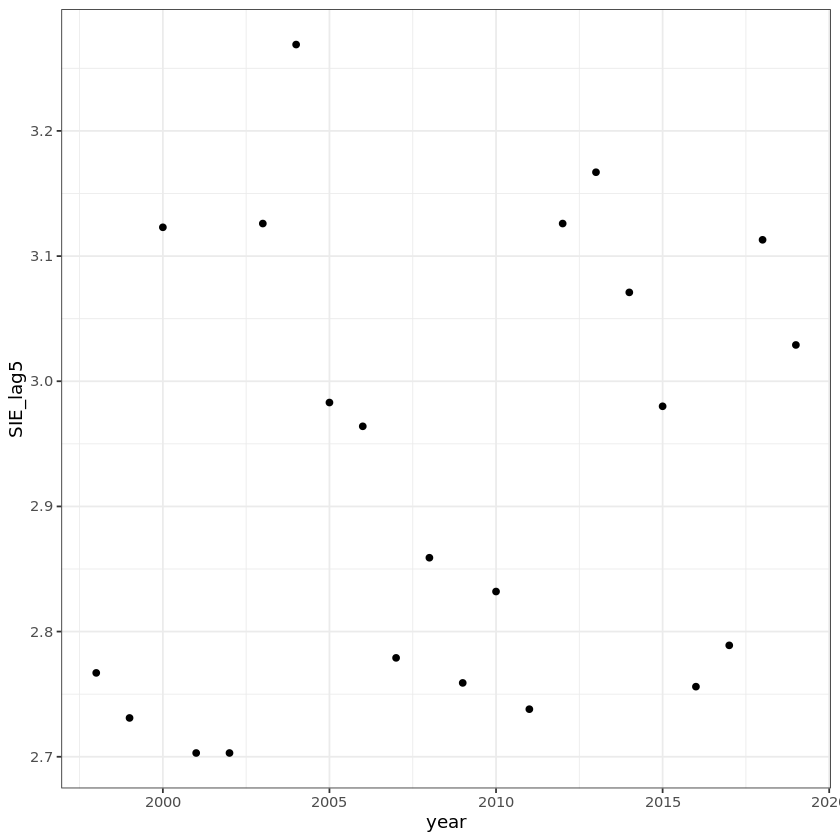

In [116]:
ggplot(master_gr,aes(x=year,y=SIE_lag5)) + geom_point()

Warning message:
“Removed 2 rows containing missing values (geom_point).”


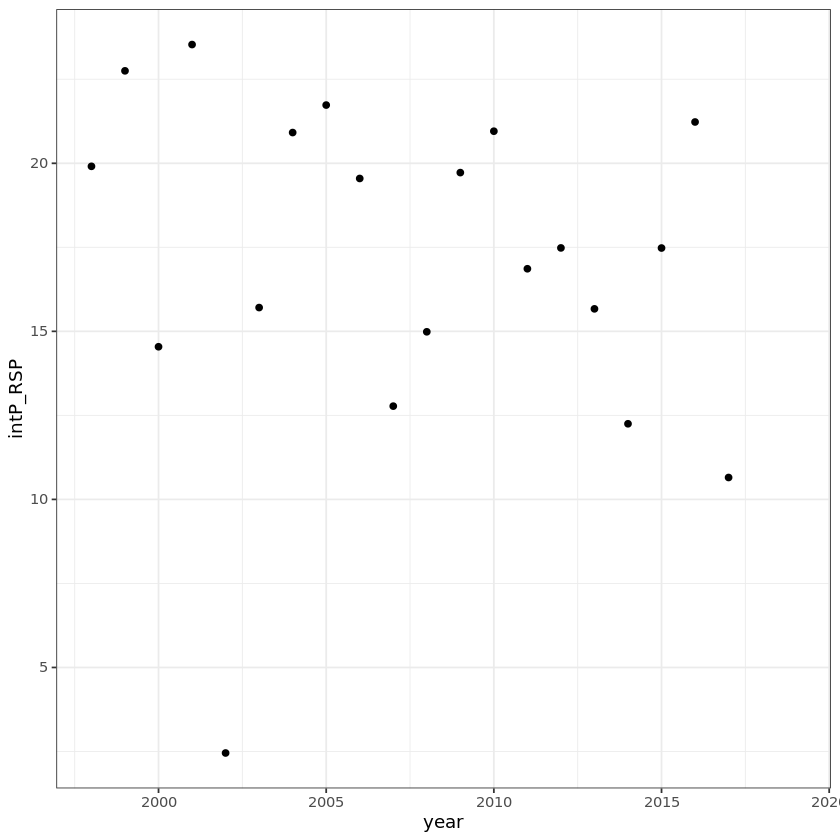

In [117]:
ggplot(master_gr,aes(x=year,y=intP_RSP)) + geom_point()

Warning message:
“Removed 2 rows containing missing values (geom_point).”


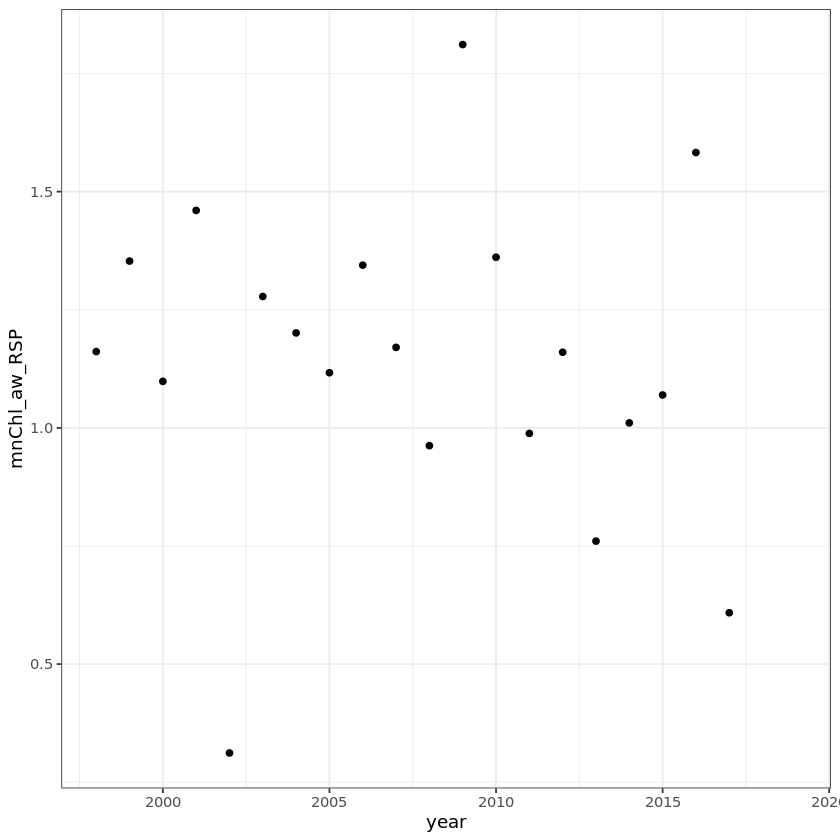

In [118]:
ggplot(master_gr,aes(x=year,y=mnChl_aw_RSP)) + geom_point()

Warning message:
“Removed 2 rows containing missing values (geom_point).”


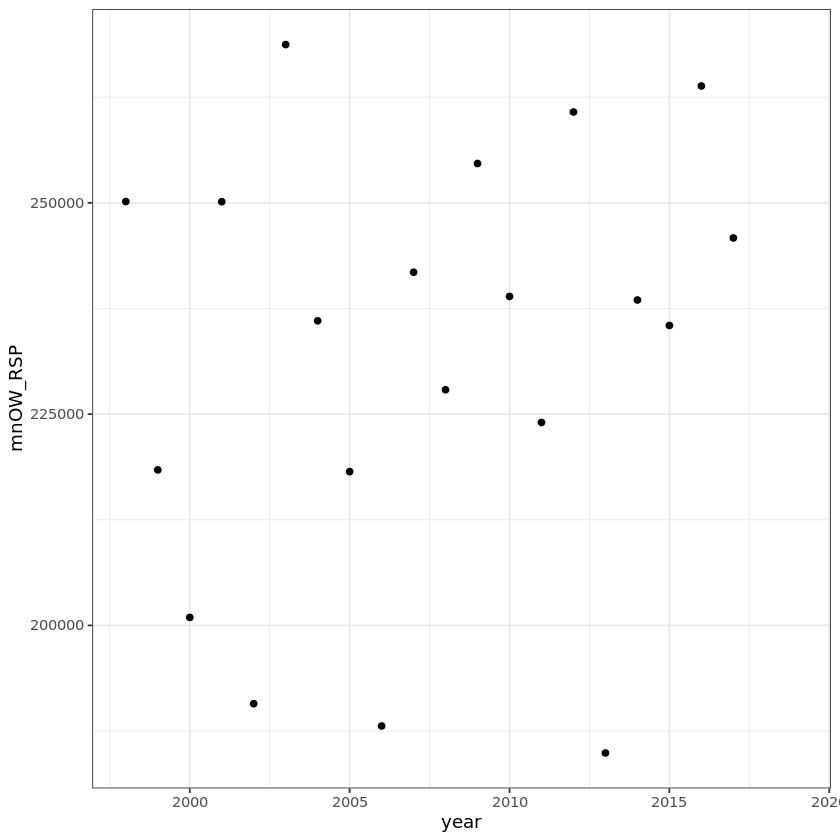

In [119]:
ggplot(master_gr,aes(x=year,y=mnOW_RSP)) + geom_point()

Warning message:
“Removed 2 rows containing missing values (geom_point).”


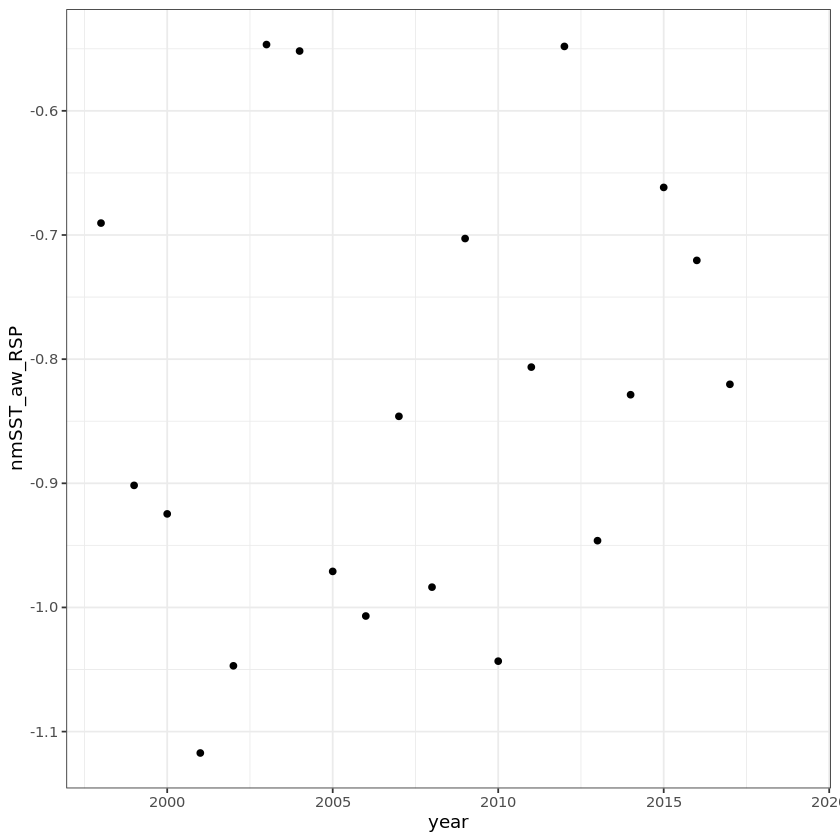

In [120]:
ggplot(master_gr,aes(x=year,y=nmSST_aw_RSP)) + geom_point()

Warning message:
“Removed 2 rows containing missing values (geom_point).”


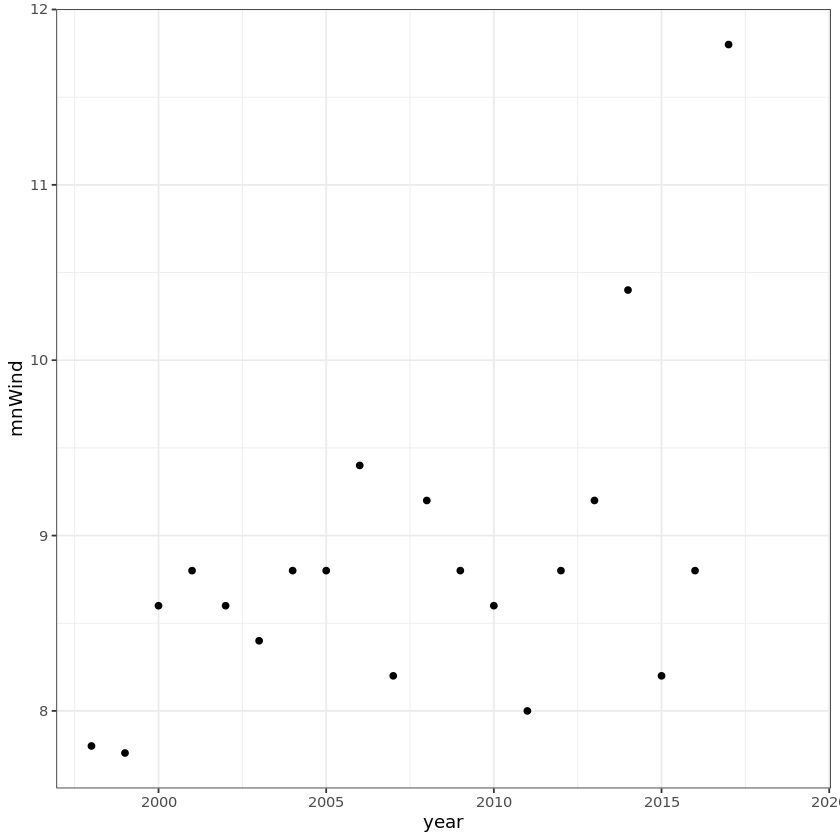

In [121]:
ggplot(master_gr,aes(x=year,y=mnWind)) + geom_point()

Warning message:
“Removed 2 rows containing missing values (geom_point).”


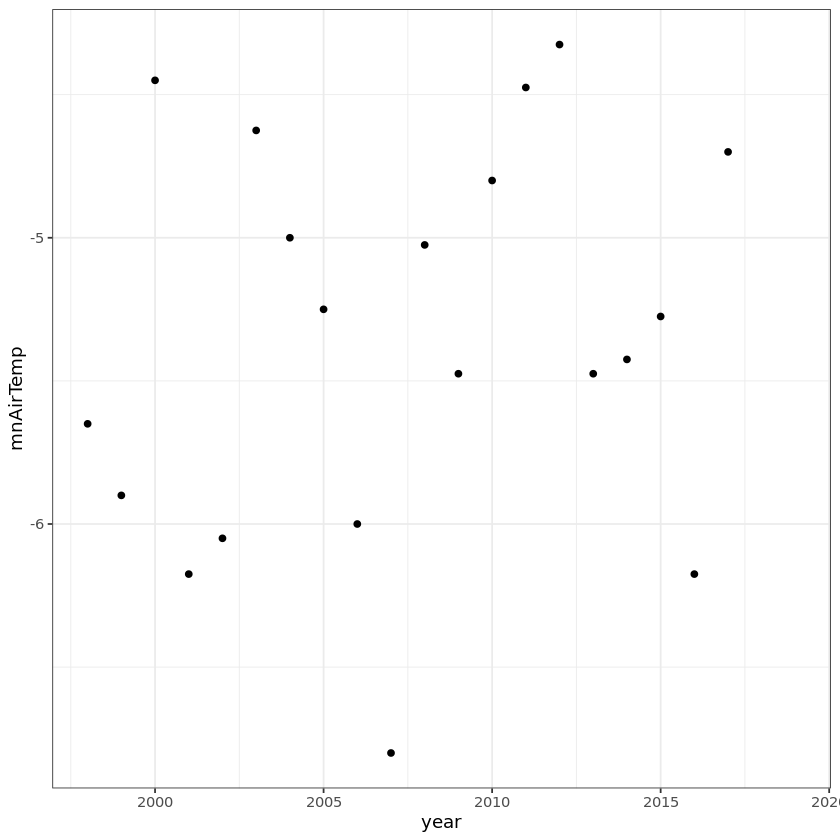

In [122]:
ggplot(master_gr,aes(x=year,y=mnAirTemp)) + geom_point()

Warning message:
“Removed 2 rows containing missing values (geom_point).”


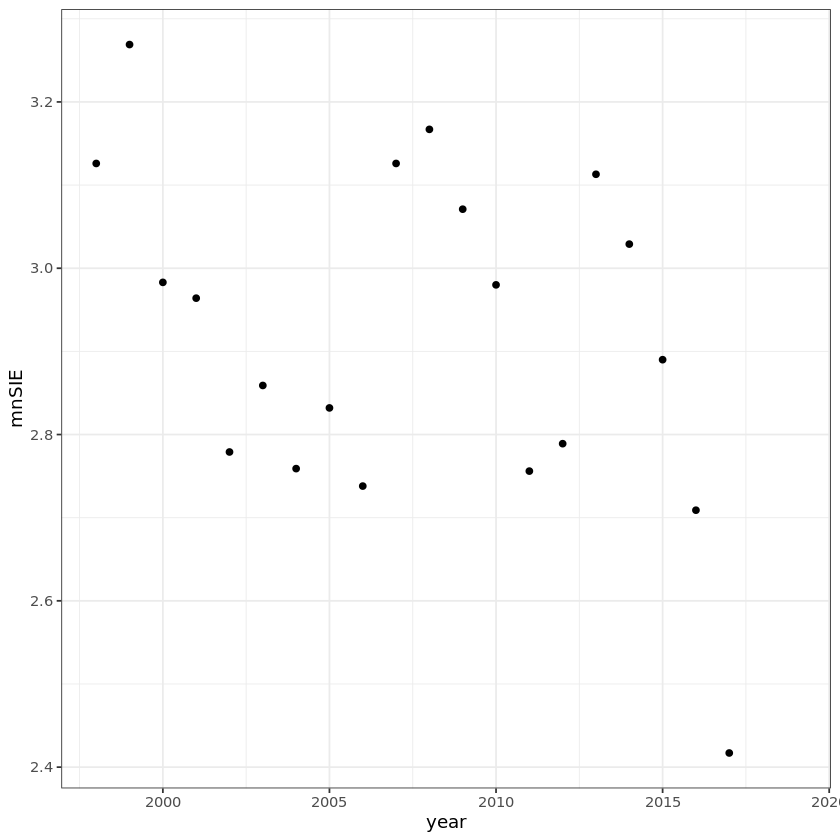

In [123]:
ggplot(master_gr,aes(x=year,y=mnSIE)) + geom_point()

Warning message:
“Removed 2 rows containing missing values (geom_point).”


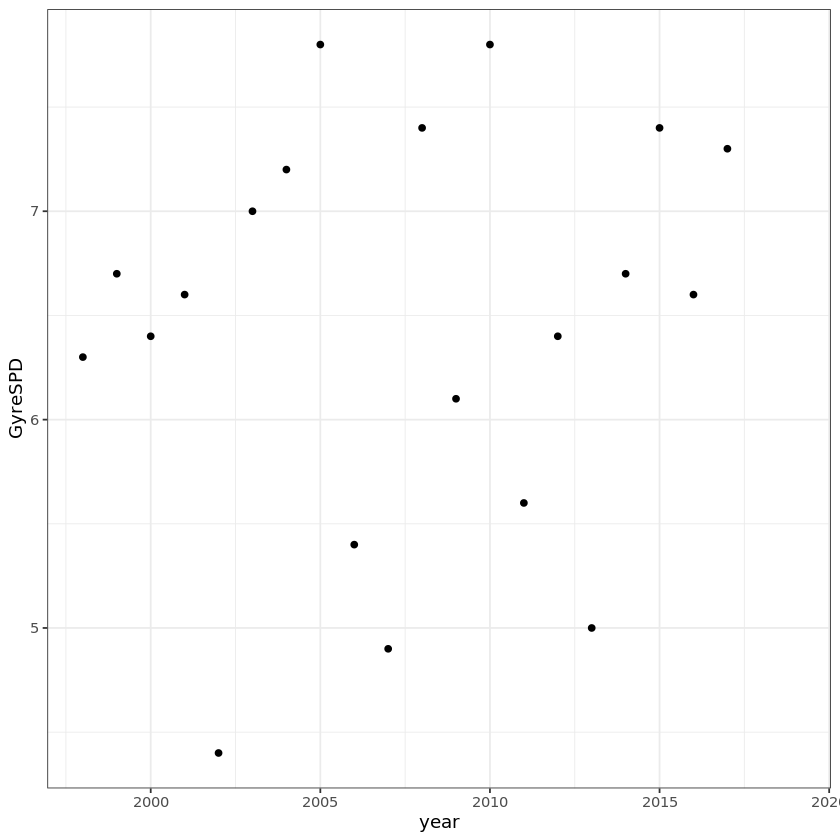

In [124]:
ggplot(master_gr,aes(x=year,y=GyreSPD)) + geom_point()

Warning message:
“Removed 6 rows containing missing values (geom_point).”


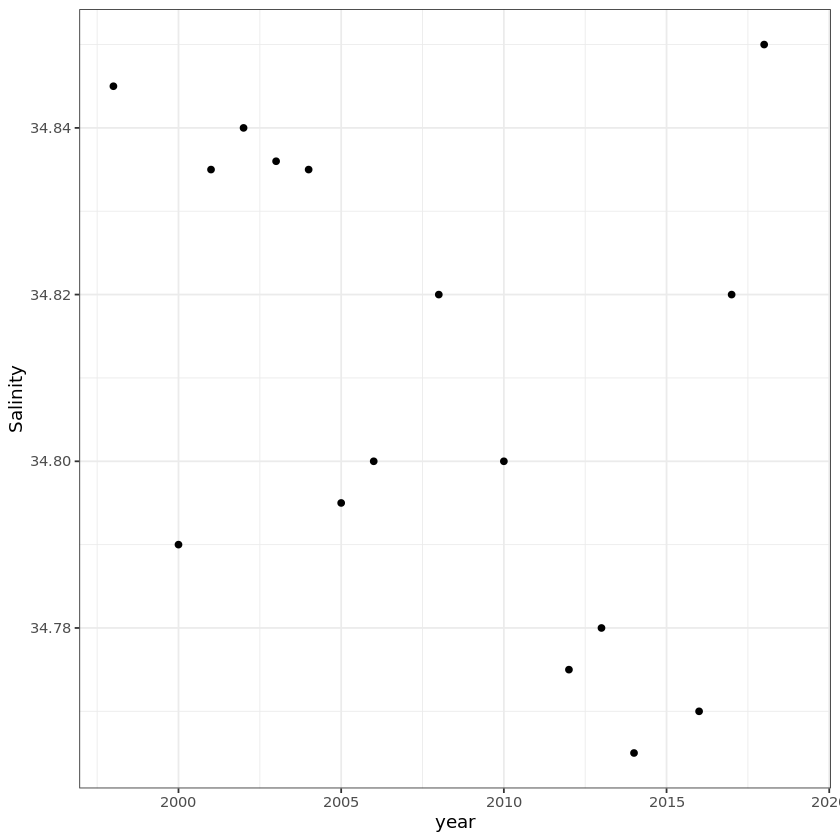

In [125]:
ggplot(master_gr,aes(x=year,y=Salinity)) + geom_point()

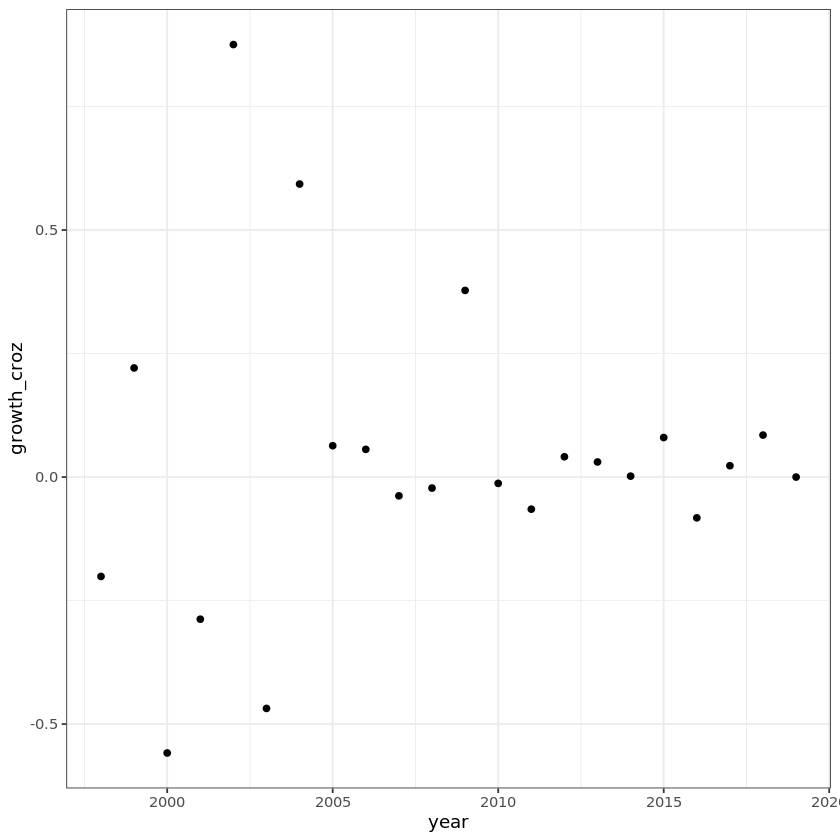

In [126]:
ggplot(master_gr,aes(x=year,y=growth_croz)) + geom_point()

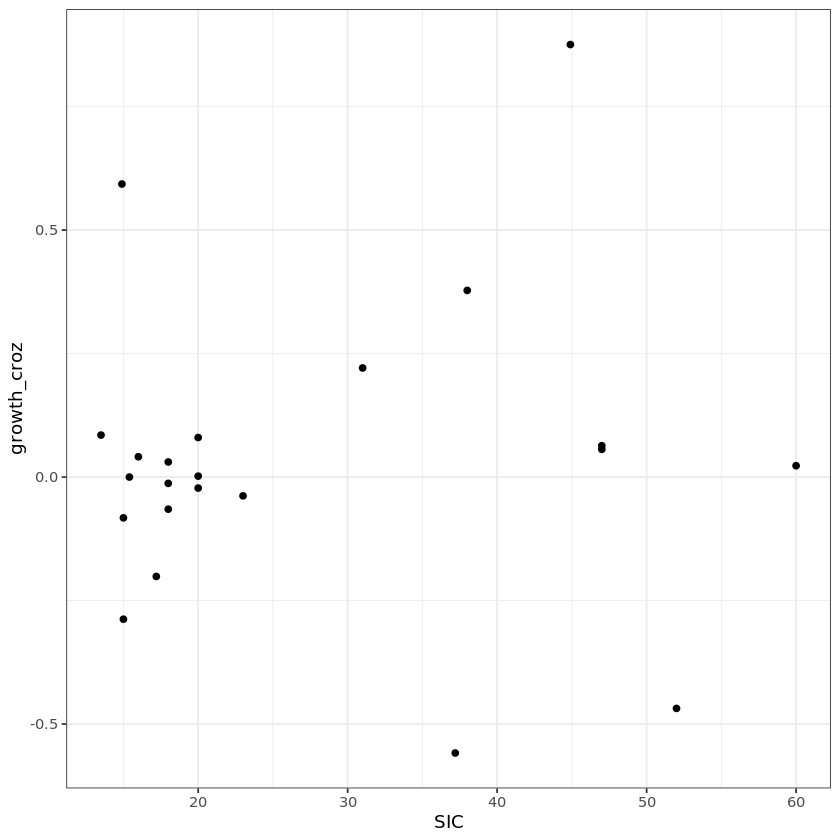

In [196]:
ggplot(master_gr,aes(x=SIC,y=growth_croz)) + geom_point()

Warning message:
“Removed 4 rows containing missing values (geom_point).”


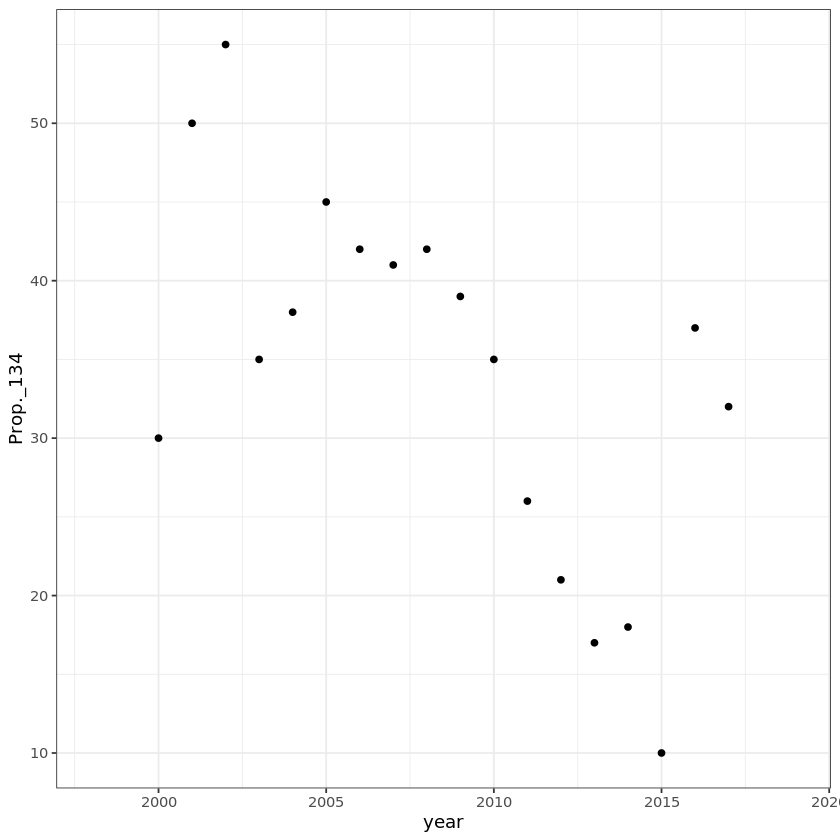

In [127]:
ggplot(master_gr,aes(x=year,y=Prop._134)) + geom_point()

# "in_frame": dataframe only with env. variables (TO USE FOR VIF)
# NO ICEBERG

In [128]:
in_frame <- master_gr %>% select (intP_RSP:mnChl_aw_RSP, nmSST_aw_RSP:GyreSPD, Salinity, mnOW_RSP6:SIE_lag5)

In [129]:
head(in_frame)

,intP_RSP,mnChl_aw_RSP,nmSST_aw_RSP,mnAirTemp,mnWind,mnSIE,GyreSPD,Salinity,mnOW_RSP6,SIE_lag5_2,SIE_lag4_2,Prop134_lag,mnSST_lag,Salinity_lag,mnWind_lag,mnAirTemp_lag5,GyreSPD_lag5,GyreSPD_lag4,SIE_lag4,SIE_lag5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,19.90901,1.161487,-0.690398,-5.650,7.80,3.126,6.3,34.845,0.250157,7.656289,NA,NA,NA,NA,NA,-4.20,5.0,5.8,NA,2.767
2,22.75003,1.353060,-0.901666,-5.900,7.76,3.269,6.7,NA,0.218399,7.458361,NA,NA,NA,NA,NA,-7.70,5.8,5.7,NA,2.731
3,14.54156,1.098477,-0.924639,-4.450,8.60,2.983,6.4,34.790,0.200943,9.753129,NA,NA,NA,NA,NA,-5.20,5.7,6.3,NA,3.123
4,23.53208,1.460241,-1.117230,-6.175,8.80,2.964,6.6,34.835,0.250135,7.306209,NA,NA,NA,NA,NA,-4.50,6.3,6.2,NA,2.703
5,2.45561,0.311760,-1.047010,-6.050,8.60,2.779,4.4,34.840,0.190735,7.306209,9.771876,NA,NA,NA,NA,-5.60,6.2,6.3,3.126,2.703
6,15.70720,1.278130,-0.546599,-4.625,8.40,2.859,7.0,34.836,0.268734,9.771876,10.686361,NA,-0.690398,34.845,7.8,-5.65,6.3,6.7,3.269,3.126


# test without 2002

In [130]:
in_frame2002 <- testChl %>% select (intP_RSP:mnChl_aw_RSP, nmSST_aw_RSP:GyreSPD, Salinity, mnOW_RSP6:SIE_lag5)

# ARIMA

In [131]:
#I included the trace function to understand the combination of p,d,q that arima checked to select the best model#
amdl<-auto.arima(master_gr$growth_croz,ic="aic", trace=TRUE)


 ARIMA(2,0,2) with non-zero mean : Inf
 ARIMA(0,0,0) with non-zero mean : 13.44177
 ARIMA(1,0,0) with non-zero mean : 9.633295
 ARIMA(0,0,1) with non-zero mean : 8.926984
 ARIMA(0,0,0) with zero mean     : 11.69635
 ARIMA(1,0,1) with non-zero mean : 10.91476
 ARIMA(0,0,2) with non-zero mean : Inf
 ARIMA(1,0,2) with non-zero mean : 12.90085
 ARIMA(0,0,1) with zero mean     : 8.780246
 ARIMA(1,0,1) with zero mean     : 10.19753
 ARIMA(0,0,2) with zero mean     : 9.949278
 ARIMA(1,0,0) with zero mean     : 8.49998
 ARIMA(2,0,0) with zero mean     : 9.970359
 ARIMA(2,0,1) with zero mean     : 10.37077

 Best model: ARIMA(1,0,0) with zero mean     



In [132]:
#checking best model
mdl1<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=T)
summary(mdl1)

Series: master_gr$growth_croz 
ARIMA(1,0,0) with drift 

Coefficients:
          ar1   drift
      -0.4744  0.0028
s.e.   0.1818  0.0029

sigma^2 estimated as 0.07502:  log likelihood=-1.81
AIC=9.61   AICc=10.95   BIC=12.89

Training set error measures:
                      ME     RMSE       MAE  MPE MAPE      MASE       ACF1
Training set 0.002329873 0.261155 0.1789309 -Inf  Inf 0.5241163 -0.1107797



	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with drift
Q* = 2.749, df = 3, p-value = 0.432

Model df: 2.   Total lags used: 5



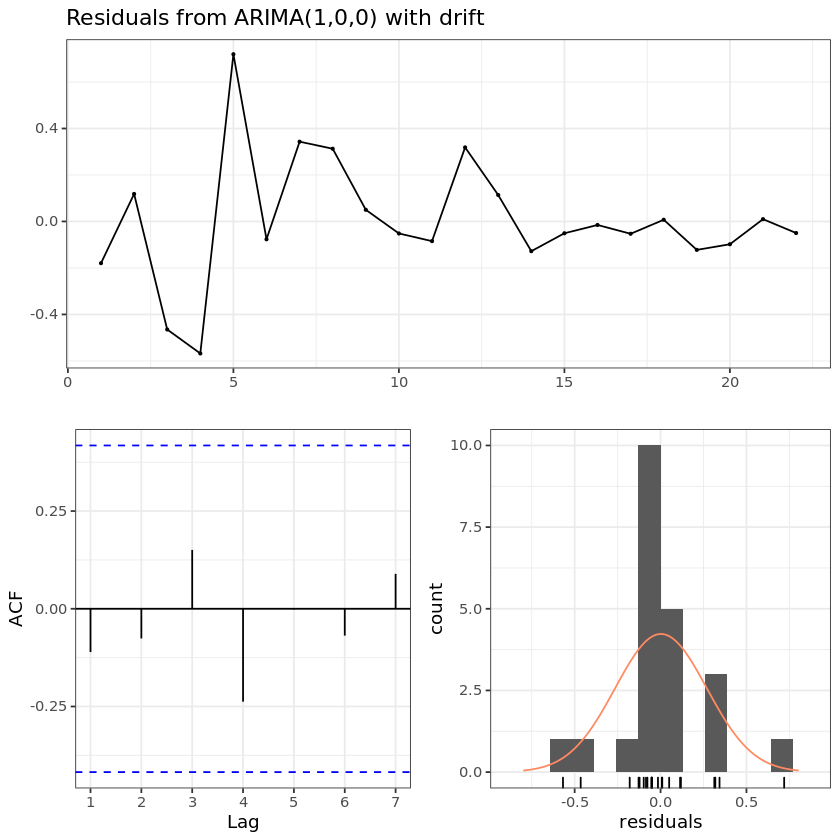

In [133]:
checkresiduals(mdl1)

In [134]:
# Compare to:
mdl1a<-Arima(master_gr$growth_croz,order=c(2,0,0),include.mean=F,include.drift=T)
summary(mdl1a)

Series: master_gr$growth_croz 
ARIMA(2,0,0) with drift 

Coefficients:
          ar1      ar2   drift
      -0.5702  -0.1940  0.0028
s.e.   0.2050   0.2022  0.0024

sigma^2 estimated as 0.07555:  log likelihood=-1.36
AIC=10.72   AICc=13.07   BIC=15.08

Training set error measures:
                      ME      RMSE       MAE  MPE MAPE     MASE        ACF1
Training set 0.003355275 0.2554313 0.1815606 -Inf  Inf 0.531819 0.009025996



	Ljung-Box test

data:  Residuals from ARIMA(2,0,0) with drift
Q* = 1.9704, df = 3, p-value = 0.5786

Model df: 3.   Total lags used: 6



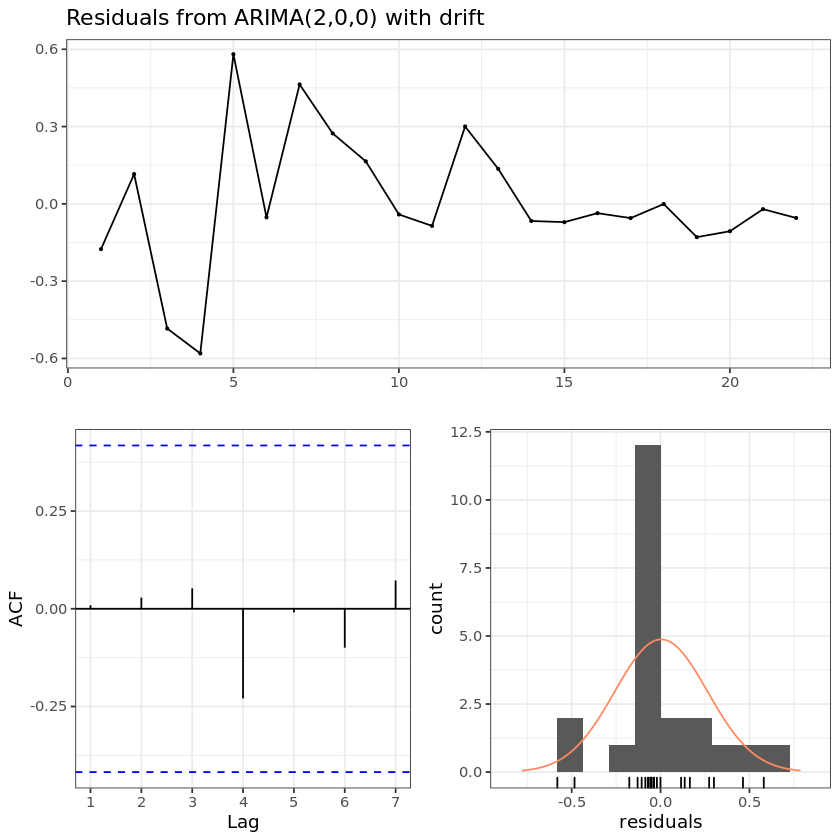

In [135]:
checkresiduals(mdl1a)

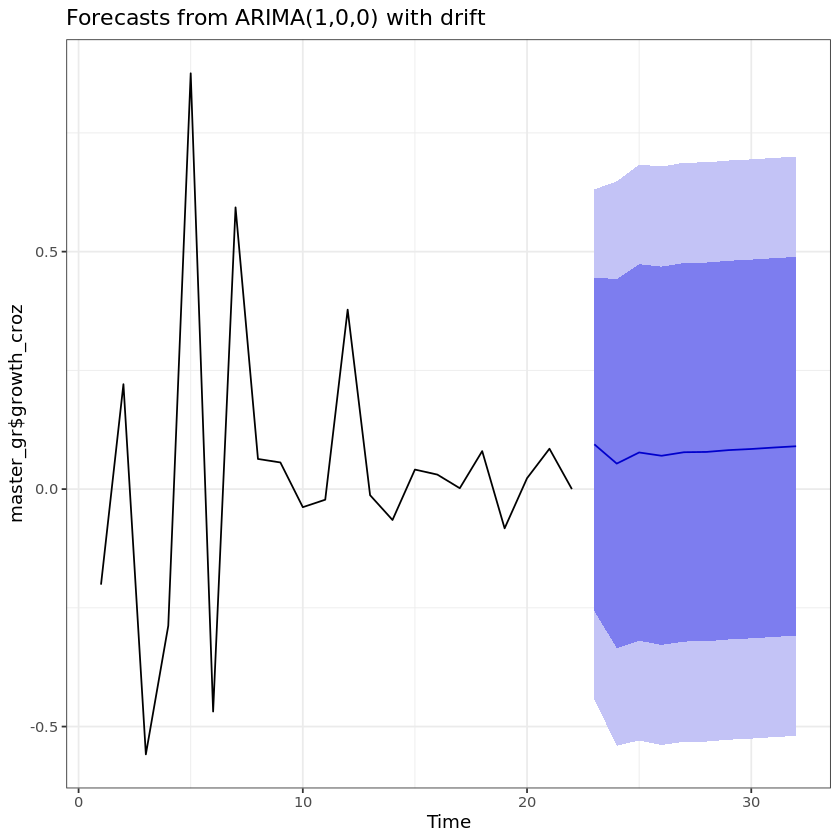

In [136]:
autoplot(forecast(mdl1))


# Plotting the correct trend

In [137]:
adcroz<-master_gr$growth_croz
names(adcroz)<-master_gr$year

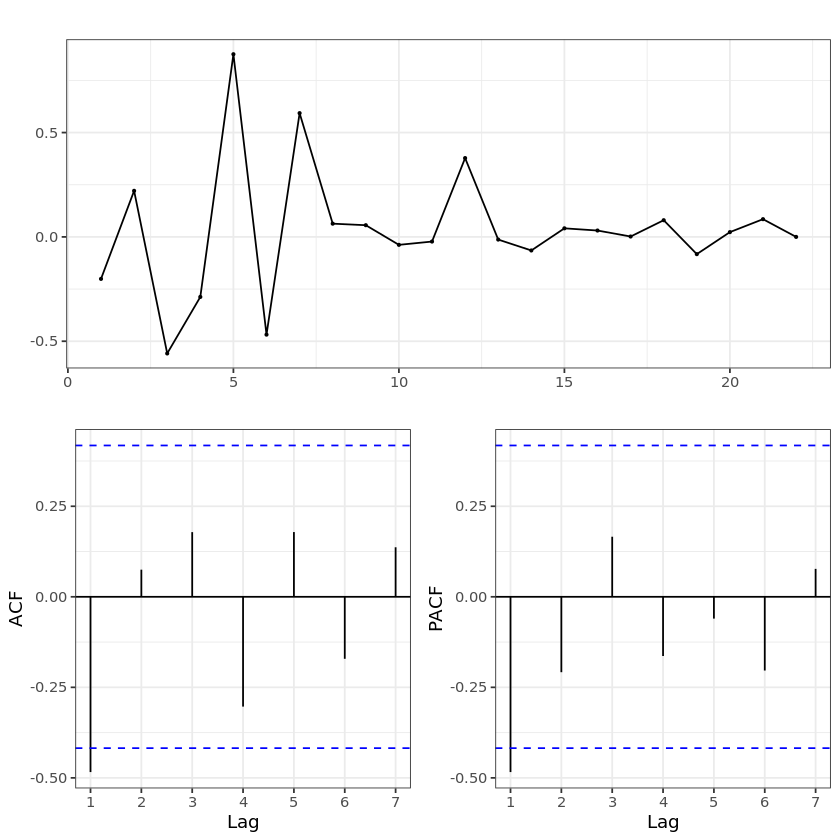

In [138]:
# Uncorrected trend
ggtsdisplay(adcroz)

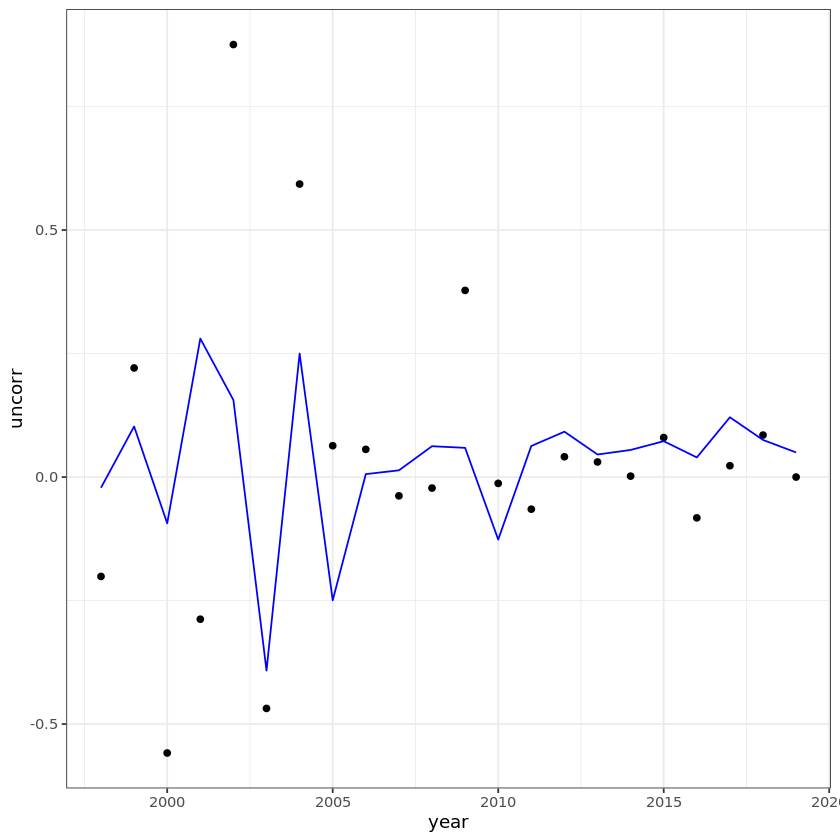

In [139]:
pdf<-data.frame(year=master$year,uncorr=mdl1$x,corr=fitted(mdl1))
ggplot(pdf,aes(x=year,y=uncorr)) + geom_point() + geom_line(aes(y=corr),color="blue")

In [140]:
save(adcroz,pdf,file="/home/ubuntu/Workspace/Anthropocene/data/bestModeldata.RData")

# Playing around with the covariates

## Removing drift term and including (1,0,0) structure

## 1st: VIF to select the environmental variables to include in the saturated model

In [141]:
#threshold at 10 (it’s equivalent to explaining 99% of the information in a variable by the set of the other covariates).

#select covariates based on variance inflation

vif_func<-function(in_frame,thresh=10,trace=T,...){
  
  
  
  if(class(in_frame) != 'data.frame') in_frame<-data.frame(in_frame)
  
  
  
  #get initial vif value for all comparisons of variables
  
  vif_init<-NULL
  
  var_names <- names(in_frame)
  
  for(val in var_names){
    
    regressors <- var_names[-which(var_names == val)]
    
    form <- paste(regressors, collapse = '+')
    
    form_in <- formula(paste(val, '~', form))
    
    vif_init<-rbind(vif_init, c(val, VIF(lm(form_in, data = in_frame, ...))))
    
  }
  
  vif_max<-max(as.numeric(vif_init[,2]), na.rm = TRUE)
  
  
  
  if(vif_max < thresh){
    
    if(trace==T){ #print output of each iteration
      
      prmatrix(vif_init,collab=c('var','vif'),rowlab=rep('',nrow(vif_init)),quote=F)
      
      cat('\n')
      
      cat(paste('All variables have VIF < ', thresh,', max VIF ',round(vif_max,2), sep=''),'\n\n')
      
    }
    
    return(var_names)
    
  }
  
  else{
    
    
    
    in_dat<-in_frame
    
    
    
    #backwards selection of explanatory variables, stops when all VIF values are below 'thresh'
    
    while(vif_max >= thresh){
      
      
      
      vif_vals<-NULL
      
      var_names <- names(in_dat)
      
      
      
      for(val in var_names){
        
        regressors <- var_names[-which(var_names == val)]
        
        form <- paste(regressors, collapse = '+')
        
        form_in <- formula(paste(val, '~', form))
        
        vif_add<-VIF(lm(form_in, data = in_dat, ...))
        
        vif_vals<-rbind(vif_vals,c(val,vif_add))
        
      }
      
      max_row<-which(vif_vals[,2] == max(as.numeric(vif_vals[,2]), na.rm = TRUE))[1]
      
      
      
      vif_max<-as.numeric(vif_vals[max_row,2])
      
      
      
      if(vif_max<thresh) break
      
      
      
      if(trace==T){ #print output of each iteration
        
        prmatrix(vif_vals,collab=c('var','vif'),rowlab=rep('',nrow(vif_vals)),quote=F)
        
        cat('\n')
        
        cat('removed: ',vif_vals[max_row,1],vif_max,'\n\n')
        
        flush.console()
        
      }
      
      
      
      in_dat<-in_dat[,!names(in_dat) %in% vif_vals[max_row,1]]
      
      
      
    }
    
    
    
    return(names(in_dat))
    
    
    
  }
  
  
  
}
  
vif_func(in_frame,thresh=10,trace=T)

 var            vif
 intP_RSP       Inf
 mnChl_aw_RSP   Inf
 nmSST_aw_RSP   Inf
 mnAirTemp      Inf
 mnWind         Inf
 mnSIE          Inf
 GyreSPD        Inf
 Salinity       Inf
 mnOW_RSP6      Inf
 SIE_lag5_2     Inf
 SIE_lag4_2     Inf
 Prop134_lag    Inf
 mnSST_lag      Inf
 Salinity_lag   Inf
 mnWind_lag     Inf
 mnAirTemp_lag5 Inf
 GyreSPD_lag5   Inf
 GyreSPD_lag4   Inf
 SIE_lag4       Inf
 SIE_lag5       Inf

removed:  intP_RSP Inf 

 var            vif
 mnChl_aw_RSP   Inf
 nmSST_aw_RSP   Inf
 mnAirTemp      Inf
 mnWind         Inf
 mnSIE          Inf
 GyreSPD        Inf
 Salinity       Inf
 mnOW_RSP6      Inf
 SIE_lag5_2     Inf
 SIE_lag4_2     Inf
 Prop134_lag    Inf
 mnSST_lag      Inf
 Salinity_lag   Inf
 mnWind_lag     Inf
 mnAirTemp_lag5 Inf
 GyreSPD_lag5   Inf
 GyreSPD_lag4   Inf
 SIE_lag4       Inf
 SIE_lag5       Inf

removed:  mnChl_aw_RSP Inf 

 var            vif
 nmSST_aw_RSP   Inf
 mnAirTemp      Inf
 mnWind         Inf
 mnSIE          Inf
 GyreSPD        Inf
 Sal

[1] "SIE_lag5_2"   "SIE_lag4_2"   "mnSST_lag"    "Salinity_lag" "mnWind_lag"  
[6] "GyreSPD_lag5" "GyreSPD_lag4"

# Chl, and Productivity showed up as redundant variables
 

# Including lags

In [142]:
cov_sat_growth<-as.matrix(master_gr[,c( "mnSIE", "SIE_lag5", "GyreSPD", "GyreSPD_lag5", "mnAirTemp", "mnAirTemp_lag5",
                              "Salinity","mnWind", "nmSST_aw_RSP")])   #"mnChl_aw_RSP",  "intP_RSP"  , "mnOW_RSP6", "nmSST_aw_RSP" 
mdlsat<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1    mnSIE  SIE_lag5  GyreSPD  GyreSPD_lag5  mnAirTemp
      -0.5467  -0.1824   -0.3986   0.0078        0.2178    -0.2884
s.e.   0.2329   0.4692    0.5799   0.1271        0.1120     0.1900
      mnAirTemp_lag5  Salinity  mnWind  nmSST_aw_RSP
             -0.2020   -0.0472  0.0008        0.7436
s.e.          0.1836    0.0876  0.0826        0.4390

sigma^2 estimated as 0.143:  log likelihood=0.71
AIC=20.58   AICc=53.58   BIC=31.53

Training set error measures:
                       ME      RMSE       MAE       MPE     MAPE     MASE
Training set -0.005541303 0.2183066 0.1634912 -72.35024 422.4701 0.478891
                   ACF1
Training set -0.6525207


In [143]:
coeftest(mdlsat)


z test of coefficients:

                  Estimate  Std. Error z value Pr(>|z|)  
ar1            -0.54671137  0.23294892 -2.3469  0.01893 *
mnSIE          -0.18235535  0.46923553 -0.3886  0.69756  
SIE_lag5       -0.39861121  0.57986836 -0.6874  0.49182  
GyreSPD         0.00777747  0.12711929  0.0612  0.95121  
GyreSPD_lag5    0.21777060  0.11197791  1.9448  0.05180 .
mnAirTemp      -0.28838115  0.18997466 -1.5180  0.12901  
mnAirTemp_lag5 -0.20199189  0.18355785 -1.1004  0.27115  
Salinity       -0.04723678  0.08763437 -0.5390  0.58987  
mnWind          0.00082012  0.08262933  0.0099  0.99208  
nmSST_aw_RSP    0.74361777  0.43895367  1.6941  0.09025 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# Excluding variables for which we cannot link a feasible causation with annual changes in colony growth at the Ross Sea

In [144]:
cov_sat_growth<-as.matrix(master_gr[,c( "mnSIE", "SIE_lag5", "GyreSPD", "GyreSPD_lag5")])   #"mnChl_aw_RSP",  "intP_RSP"  , "mnOW_RSP6", "nmSST_aw_RSP" ,  "Salinity","mnWind"
mdlsat<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1    mnSIE  SIE_lag5  GyreSPD  GyreSPD_lag5
      -0.5101  -0.1470    0.0115  -0.0747        0.1455
s.e.   0.1864   0.1617    0.1904   0.0618        0.0643

sigma^2 estimated as 0.07864:  log likelihood=-0.22
AIC=12.45   AICc=18.91   BIC=18.42

Training set error measures:
                       ME      RMSE       MAE       MPE     MAPE      MASE
Training set 0.0003713632 0.2428604 0.1856616 -223.4328 452.2374 0.5438315
                   ACF1
Training set -0.2197226


In [145]:
coeftest(mdlsat)


z test of coefficients:

              Estimate Std. Error z value Pr(>|z|)   
ar1          -0.510149   0.186448 -2.7362 0.006216 **
mnSIE        -0.146989   0.161714 -0.9089 0.363379   
SIE_lag5      0.011473   0.190446  0.0602 0.951962   
GyreSPD      -0.074687   0.061828 -1.2080 0.227057   
GyreSPD_lag5  0.145458   0.064308  2.2619 0.023704 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# Including prop. 134 (fish) to the environmental model above

In [146]:
cov_sat_growth<-as.matrix(master_gr[,c( "mnSIE", "SIE_lag5", "GyreSPD", "GyreSPD_lag5", "Prop._134")])   #"mnChl_aw_RSP",  "intP_RSP"  , "mnOW_RSP6", "nmSST_aw_RSP" ,  "Salinity","mnWind"
mdlsat<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1    mnSIE  SIE_lag5  GyreSPD  GyreSPD_lag5  Prop._134
      -0.5446  -0.4159    0.1744  -0.1163        0.2028     0.0058
s.e.   0.2126   0.2160    0.2057   0.0650        0.0767     0.0034

sigma^2 estimated as 0.08012:  log likelihood=0.65
AIC=12.7   AICc=23.9   BIC=18.93

Training set error measures:
                       ME      RMSE       MAE      MPE     MAPE      MASE
Training set -0.009645147 0.2311086 0.1823167 108.7114 313.8507 0.5340338
                   ACF1
Training set -0.1356943


In [147]:
coeftest(mdlsat)


z test of coefficients:

               Estimate Std. Error z value Pr(>|z|)   
ar1          -0.5446400  0.2126040 -2.5618 0.010414 * 
mnSIE        -0.4159282  0.2160051 -1.9255 0.054161 . 
SIE_lag5      0.1744423  0.2056603  0.8482 0.396323   
GyreSPD      -0.1162926  0.0650329 -1.7882 0.073742 . 
GyreSPD_lag5  0.2027542  0.0766533  2.6451 0.008167 **
Prop._134     0.0057886  0.0033968  1.7042 0.088352 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


 
# Including a 4 years lag, seems that the model performs much better in terms of AIC value, instead a 5 years lag:

In [148]:
cov_sat_growth<-as.matrix(master_gr[,c( "mnSIE", "SIE_lag4", "GyreSPD", "GyreSPD_lag4", "Prop._134")])   #"mnChl_aw_RSP",  "intP_RSP"  , "mnOW_RSP6", "nmSST_aw_RSP" ,  "Salinity","mnWind"
mdlsat<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1    mnSIE  SIE_lag4  GyreSPD  GyreSPD_lag4  Prop._134
      -0.9248  -0.2790   -0.0356   0.0199        0.1091     0.0048
s.e.   0.0952   0.1294    0.0898   0.0275        0.0438     0.0020

sigma^2 estimated as 0.03663:  log likelihood=6.55
AIC=0.91   AICc=14.91   BIC=6.32

Training set error measures:
                     ME      RMSE       MAE      MPE     MAPE      MASE
Training set 0.01303009 0.1513028 0.1126986 71.72419 403.4061 0.3301115
                     ACF1
Training set -0.001681129


In [149]:
coeftest(mdlsat)


z test of coefficients:

               Estimate Std. Error z value Pr(>|z|)    
ar1          -0.9248142  0.0952101 -9.7134  < 2e-16 ***
mnSIE        -0.2789713  0.1293915 -2.1560  0.03108 *  
SIE_lag4     -0.0356140  0.0898332 -0.3964  0.69178    
GyreSPD       0.0199189  0.0275492  0.7230  0.46966    
GyreSPD_lag4  0.1091144  0.0438089  2.4907  0.01275 *  
Prop._134     0.0048416  0.0020318  2.3830  0.01717 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# Including LAG to Prop 134 ( remembering that we are loosing some years because we don't have data for Prop 134 before 1998)

In [150]:
cov_sat_growth<-as.matrix(master_gr[,c("mnSIE", "SIE_lag4","GyreSPD", "GyreSPD_lag4", "Prop._134", "Prop134_lag")])   #"mnChl_aw_RSP",  "intP_RSP"  , "mnOW_RSP6", "nmSST_aw_RSP" ,  "Salinity","mnWind"
mdlsat<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1    mnSIE  SIE_lag4  GyreSPD  GyreSPD_lag4  Prop._134  Prop134_lag
      -0.5637  -0.1349   -0.1307   0.0341        0.0678     0.0011       0.0033
s.e.   0.2975   0.3115    0.0820   0.0510        0.0625     0.0018       0.0072

sigma^2 estimated as 0.01792:  log likelihood=12.53
AIC=-9.06   AICc=26.94   BIC=-4.54

Training set error measures:
                        ME       RMSE        MAE       MPE     MAPE      MASE
Training set -0.0009719566 0.09093242 0.06952028 -99.34864 352.6635 0.2036356
                   ACF1
Training set -0.2342526


In [151]:
coeftest(mdlsat)


z test of coefficients:

               Estimate Std. Error z value Pr(>|z|)  
ar1          -0.5636644  0.2974899 -1.8947  0.05813 .
mnSIE        -0.1349329  0.3115250 -0.4331  0.66492  
SIE_lag4     -0.1307315  0.0820150 -1.5940  0.11094  
GyreSPD       0.0341122  0.0509504  0.6695  0.50317  
GyreSPD_lag4  0.0678319  0.0625059  1.0852  0.27783  
Prop._134     0.0010788  0.0017812  0.6057  0.54474  
Prop134_lag   0.0032555  0.0072037  0.4519  0.65133  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# Including quadratic effects for lag_SIE (see Ballerini et al 2009) 

In [152]:
cov_sat_growth<-as.matrix(master_gr[,c("mnSIE", "SIE_lag4_2", "SIE_lag4", "GyreSPD", "GyreSPD_lag4", "Prop._134")])   #"mnChl_aw_RSP",  "intP_RSP"  , "mnOW_RSP6", "nmSST_aw_RSP" ,  "Salinity","mnWind"
mdlsat<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1    mnSIE  SIE_lag4_2  SIE_lag4  GyreSPD  GyreSPD_lag4  Prop._134
      -0.9483  -0.0085      0.1598   -0.7764   0.0562        0.0709     0.0053
s.e.   0.0698   0.2543      0.1322    0.6176   0.0391        0.0518     0.0019

sigma^2 estimated as 0.03657:  log likelihood=7.22
AIC=1.56   AICc=22.13   BIC=7.74

Training set error measures:
                     ME      RMSE       MAE      MPE     MAPE      MASE
Training set 0.01284825 0.1434223 0.1070986 68.23478 343.4562 0.3137085
                   ACF1
Training set -0.2088647


In [153]:
coeftest(mdlsat)


z test of coefficients:

               Estimate Std. Error  z value  Pr(>|z|)    
ar1          -0.9482606  0.0697928 -13.5868 < 2.2e-16 ***
mnSIE        -0.0085175  0.2542578  -0.0335  0.973276    
SIE_lag4_2    0.1598120  0.1321965   1.2089  0.226702    
SIE_lag4     -0.7764369  0.6175586  -1.2573  0.208656    
GyreSPD       0.0561787  0.0390541   1.4385  0.150297    
GyreSPD_lag4  0.0708892  0.0517866   1.3689  0.171039    
Prop._134     0.0053233  0.0019460   2.7355  0.006228 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# AIC best models set

In [197]:
#1
mod_1<-as.matrix(master_gr[,c( "mnSIE", "SIE_lag5", "GyreSPD", "GyreSPD_lag5")])  
mod1<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= mod_1)
summary(mod1)
#2
 mod_2<-as.matrix(master_gr[,c("mnSIE", "SIE_lag5", "GyreSPD", "GyreSPD_lag5", "Prop._134")])  
mod2<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg=  mod_2)
summary(mod2)
#3
mod_3<-as.matrix(master_gr[,c( "mnSIE", "SIE_lag4", "GyreSPD", "GyreSPD_lag4", "Prop._134")])   
mod3<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= mod_3)
summary(mod3)
#4
mod_4<-as.matrix(master_gr[,c( "mnSIE", "SIE_lag4_2", "SIE_lag4", "GyreSPD", "GyreSPD_lag4", "Prop._134")])  
mod4<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg=  mod_4)
summary(mod4)

#7
mod_7<-as.matrix(master_gr[,c( "SIE_lag4_2", "SIE_lag4", "GyreSPD", "GyreSPD_lag4", "Prop._134")])  
mod7<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg=  mod_7)
summary(mod7)

#5
mod_5<-as.matrix(master_gr[,c( "mnSIE", "SIE_lag4_2", "GyreSPD", "GyreSPD_lag4", "Prop._134")])  
mod5<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg=  mod_5)
summary(mod5)

#6
mod_6<-as.matrix(master_gr[,c( "mnSIE", "SIE_lag5", "GyreSPD", "GyreSPD_lag5", "mnAirTemp", "mnAirTemp_lag5","Salinity","mnWind", "nmSST_aw_RSP")])  
mod6<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg=  mod_6)
summary(mod6)




Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1    mnSIE  SIE_lag5  GyreSPD  GyreSPD_lag5
      -0.5101  -0.1470    0.0115  -0.0747        0.1455
s.e.   0.1864   0.1617    0.1904   0.0618        0.0643

sigma^2 estimated as 0.07864:  log likelihood=-0.22
AIC=12.45   AICc=18.91   BIC=18.42

Training set error measures:
                       ME      RMSE       MAE       MPE     MAPE      MASE
Training set 0.0003713632 0.2428604 0.1856616 -223.4328 452.2374 0.5438315
                   ACF1
Training set -0.2197226
Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1    mnSIE  SIE_lag5  GyreSPD  GyreSPD_lag5  Prop._134
      -0.5446  -0.4159    0.1744  -0.1163        0.2028     0.0058
s.e.   0.2126   0.2160    0.2057   0.0650        0.0767     0.0034

sigma^2 estimated as 0.08012:  log likelihood=0.65
AIC=12.7   AICc=23.9   BIC=18.93

Training set error measures:
                       ME      RMS

# three competitive models:


In [155]:
A <- logLik(mod3)
A
B <- logLik(mod4)
B
C <- logLik(mod5)
C

'log Lik.' 6.54606 (df=7)

'log Lik.' 7.22107 (df=8)

'log Lik.' 6.496947 (df=7)

In [156]:
coeftest(mod3)


z test of coefficients:

               Estimate Std. Error z value Pr(>|z|)    
ar1          -0.9248142  0.0952101 -9.7134  < 2e-16 ***
mnSIE        -0.2789713  0.1293915 -2.1560  0.03108 *  
SIE_lag4     -0.0356140  0.0898332 -0.3964  0.69178    
GyreSPD       0.0199189  0.0275492  0.7230  0.46966    
GyreSPD_lag4  0.1091144  0.0438089  2.4907  0.01275 *  
Prop._134     0.0048416  0.0020318  2.3830  0.01717 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [157]:
confint(mod3,conf.level = 0.95, method="Wald")

,2.5 %,97.5 %
ar1,-1.1114226653,-0.738205781
mnSIE,-0.5325739309,-0.025368636
SIE_lag4,-0.2116837789,0.140455704
GyreSPD,-0.0340765362,0.073914361
GyreSPD_lag4,0.0232504958,0.194978345
Prop._134,0.0008594367,0.008823825


In [158]:
coeftest(mod4)


z test of coefficients:

               Estimate Std. Error  z value  Pr(>|z|)    
ar1          -0.9482606  0.0697928 -13.5868 < 2.2e-16 ***
mnSIE        -0.0085175  0.2542578  -0.0335  0.973276    
SIE_lag4_2    0.1598120  0.1321965   1.2089  0.226702    
SIE_lag4     -0.7764369  0.6175586  -1.2573  0.208656    
GyreSPD       0.0561787  0.0390541   1.4385  0.150297    
GyreSPD_lag4  0.0708892  0.0517866   1.3689  0.171039    
Prop._134     0.0053233  0.0019460   2.7355  0.006228 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [159]:
confint(mod4,conf.level = 0.95, method="Wald")

,2.5 %,97.5 %
ar1,-1.08505196,-0.811469141
mnSIE,-0.50685366,0.489818581
SIE_lag4_2,-0.09928839,0.418912445
SIE_lag4,-1.98682947,0.433955681
GyreSPD,-0.02036593,0.132723312
GyreSPD_lag4,-0.03061063,0.172389059
Prop._134,0.00150924,0.009137433


In [160]:
coeftest(mod5)


z test of coefficients:

               Estimate Std. Error z value Pr(>|z|)    
ar1          -0.9215905  0.0979876 -9.4052  < 2e-16 ***
mnSIE        -0.2972287  0.1166103 -2.5489  0.01081 *  
SIE_lag4_2   -0.0046221  0.0193353 -0.2391  0.81107    
GyreSPD       0.0172795  0.0264671  0.6529  0.51384    
GyreSPD_lag4  0.1100814  0.0443905  2.4798  0.01314 *  
Prop._134     0.0048189  0.0020433  2.3584  0.01835 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [161]:
confint(mod5,conf.level = 0.95, method="Wald")

,2.5 %,97.5 %
ar1,-1.1136427341,-0.72953832
mnSIE,-0.5257808159,-0.06867667
SIE_lag4_2,-0.0425186573,0.03327440
GyreSPD,-0.0345950402,0.06915395
GyreSPD_lag4,0.0230775497,0.19708525
Prop._134,0.0008141855,0.00882362


In [198]:
coeftest(mod7)


z test of coefficients:

               Estimate Std. Error  z value  Pr(>|z|)    
ar1          -0.9485944  0.0687844 -13.7908 < 2.2e-16 ***
SIE_lag4_2    0.1636926  0.0630744   2.5952  0.009453 ** 
SIE_lag4     -0.7950936  0.2638771  -3.0131  0.002586 ** 
GyreSPD       0.0569794  0.0307707   1.8517  0.064063 .  
GyreSPD_lag4  0.0694832  0.0305364   2.2754  0.022881 *  
Prop._134     0.0053312  0.0019337   2.7570  0.005834 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# CHECKING SIC


In [177]:
mod_7<-as.matrix(master_gr[,c("SIC", "GyreSPD", "GyreSPD_lag4", "Prop._134")])  
mod7<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg=  mod_7)
summary(mod7)

Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1     SIC  GyreSPD  GyreSPD_lag4  Prop._134
      -0.4829  0.0009  -0.0397        0.0255     0.0034
s.e.   0.2392  0.0053   0.0491        0.0494     0.0053

sigma^2 estimated as 0.1032:  log likelihood=-2.3
AIC=16.6   AICc=24.24   BIC=21.95

Training set error measures:
                    ME      RMSE       MAE      MPE     MAPE      MASE
Training set -0.015442 0.2729682 0.1980362 36.47143 252.4204 0.5800786
                    ACF1
Training set -0.02477729


In [192]:
#I'm missing 3 years!! 
mod_8<-as.matrix(master_gr[,c( "SIC_lag4", "GyreSPD", "GyreSPD_lag4", "Prop._134")])  
mod8<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg=  mod_8)
summary(mod8)

Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  SIC_lag4  GyreSPD  GyreSPD_lag4  Prop._134
      -0.8084   -0.0030  -0.0219        0.0199     0.0054
s.e.   0.1426    0.0026   0.0269        0.0286     0.0022

sigma^2 estimated as 0.04371:  log likelihood=4.92
AIC=2.17   AICc=10.57   BIC=7.17

Training set error measures:
                      ME      RMSE       MAE      MPE     MAPE      MASE
Training set -0.01614761 0.1756557 0.1490752 -63.6809 403.9368 0.4366641
                    ACF1
Training set -0.06115849


In [193]:
coeftest(mod8)


z test of coefficients:

               Estimate Std. Error z value  Pr(>|z|)    
ar1          -0.8083598  0.1425660 -5.6701 1.427e-08 ***
SIC_lag4     -0.0030464  0.0026025 -1.1706   0.24177    
GyreSPD      -0.0218984  0.0268921 -0.8143   0.41547    
GyreSPD_lag4  0.0198711  0.0286315  0.6940   0.48766    
Prop._134     0.0054161  0.0022101  2.4506   0.01426 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Partial dependence plots

In [294]:
## function to generate the data
# df is the source data.frame (marter_gr)
# varv is the variable for which to construct the partial dependence plot
# meanmed indicates if fixing other variables to their mean or median value
# mdl is the model in which to evaluate the partial dependence
# type indicates if evaluating the dependence on a sequence of the predictor values or their real values
getPDdata<-function(df,varv, meanmed="mean", mdl, type="seq"){
    #get fixed values of constant vars
    cvars<-names(coef(mdl)); cvars<-cvars[which(!cvars %in% c(varv,"ar1","ar2","ar3"))]
    pddc<-sapply(cvars,function(vv,df,meanmed){
        mvv<-ifelse(meanmed=="mean",mean(df[,vv],na.rm=T),median(df[,vv],na.rm=T))
    },df=df,meanmed=meanmed)
    
    #get varying values of partial dependence var
    if(type=="seq"){
        minprv<-min(df[,varv],na.rm=T); maxprv<-max(df[,varv],na.rm=T)
        prv<-seq(minprv,maxprv,length.out=nrow(df))
    }else{
        prv<-unique(df[,varv])
    }
    pddf<-data.frame(prv=prv);names(pddf)<-varv
    
    #combine into matrix
    for(ii in 1:NROW(pddc)){
        cvn<-pddc[ii]; cvnn<-cvars[ii]
        pddf<-cbind(pddf,cvnv=rep(cvn,nrow(pddf)))
        names(pddf)<-gsub("cvnv",cvnn,names(pddf))
    }
    #must re-order as in the original matrix used to train the model
    cvars<-names(coef(mdl)); cvars<-cvars[which(!cvars %in% c("ar1","ar2","ar3"))]
    pddf<-pddf[,cvars]
    pdmx<-as.matrix(pddf)
    
    preds<-forecast(mdl,xreg=pdmx,level=95)
    plotdata<-data.frame(varv=prv,meanv=as.numeric(preds$mean),
                         lcv=as.numeric(preds$lower),ucv=as.numeric(preds$upper))
    names(plotdata)<-gsub("varv",varv,names(plotdata))
    return(plotdata)
}



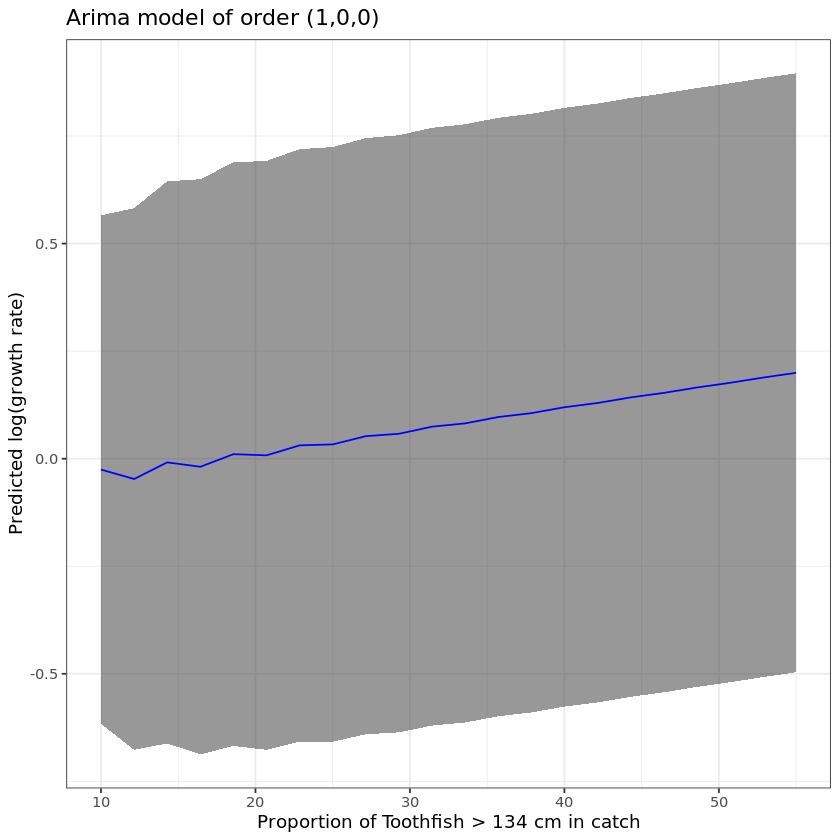

In [299]:
pdat<-getPDdata(df=master_gr,varv="Prop._134",mdl=mod8)
ggplot(pdat,aes(x=Prop._134,y=meanv)) + geom_ribbon(aes(ymin=lcv,ymax=ucv),alpha=0.5) + geom_line(color="blue") +
    labs(x="Proportion of Toothfish > 134 cm in catch", y = "Predicted log(growth rate)", title="Arima model of order (1,0,0)")